In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import os
from tqdm import tqdm

In [36]:
keys = ['nodes', 'elements', 'edges', 'flow']
data_files = {}

for key in keys:
    files = os.listdir('TrainingData/LowReFlowData/dataset_shapes_gcnn/' + key + '/')
    files = [f for f in files if f.endswith('.csv')]
    code = [int(f.split('_')[1].split('.')[0]) for f in files]
    data_files[key+'_files'] = files
    data_files[key+'_code'] = code
    

In [40]:
data = []

for i in tqdm(range(len(data_files['nodes_files']))):
    nodes = pd.read_csv('TrainingData/LowReFlowData/dataset_shapes_gcnn/nodes/' + data_files['nodes_files'][i])
    elements = pd.read_csv('TrainingData/LowReFlowData/dataset_shapes_gcnn/elements/' + data_files['elements_files'][i])
    edges = pd.read_csv('TrainingData/LowReFlowData/dataset_shapes_gcnn/edges/' + data_files['edges_files'][i])
    flow = pd.read_csv('TrainingData/LowReFlowData/dataset_shapes_gcnn/flow/' + data_files['flow_files'][i])
    data.append([{'nodes':nodes, 'elements':elements, 'edges':edges, 'flow':flow}])

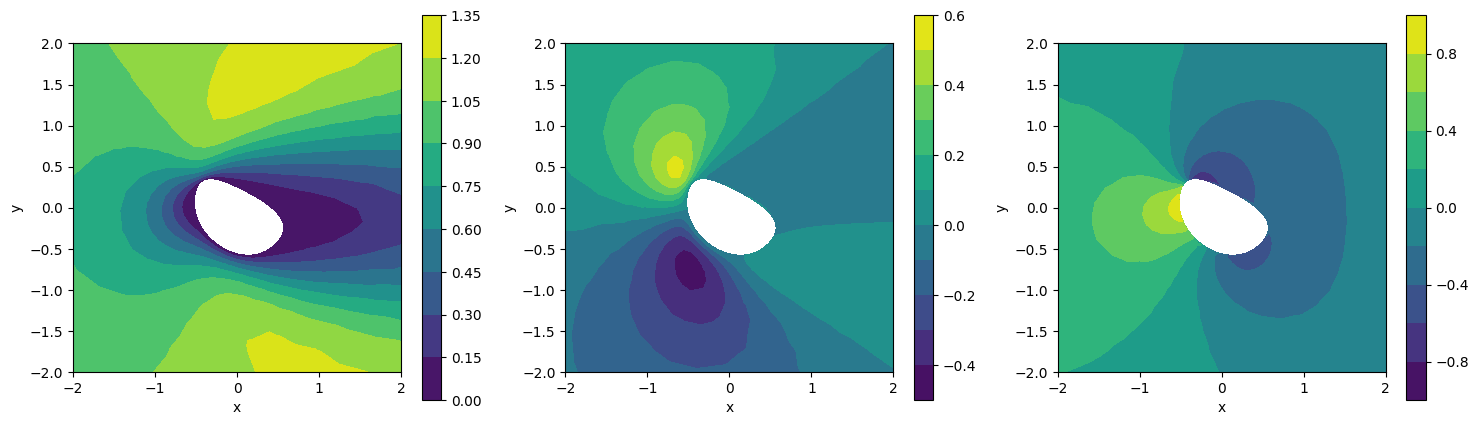

In [57]:
def PlotFEMsolution(nodes, elements,l):
    if elements.shape[1] == 4:
        # Convert quadrlateral mesh to triangular mesh
        elements = np.concatenate([elements[:,:3],elements[:,1:]],0)

    # Create a Triangulation object
    triangulation = tri.Triangulation(nodes[:, 0], nodes[:, 1], elements)

    # Plotting
    r = l.shape[1]
    plt.figure(figsize=(6*r,5))
    for i in range(r):
        plt.subplot(1,r,i+1)
        plt.tricontourf(triangulation, l[:,i],10)
        plt.colorbar()
        # plt.scatter(nodes[:,0],nodes[:,1],s=1,c='k')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.gca().set_aspect('equal', adjustable='box')
    return 

PlotFEMsolution(data[0][0]['nodes'].values, data[0][0]['elements'].values, data[0][0]['flow'].values)

In [52]:
elements.max()

V1    2488
V2    2488
V3    2505
dtype: int64

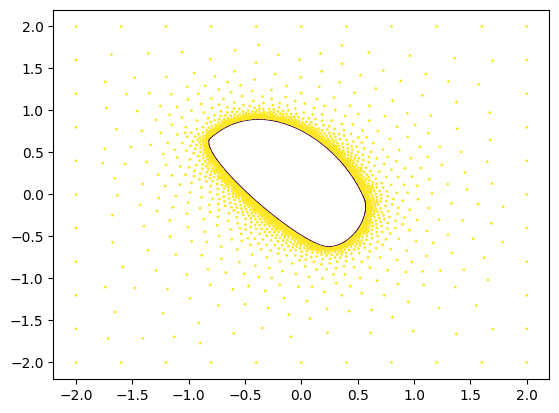

In [44]:
plt.scatter(nodes['x'], nodes['y'],c=nodes['Object'],s=1)